1) Nuskaityti faktinius elektros gamybos duomenis kuriuose matytusi kaupimo įrenginių, saulės elektrinės, kitų energijos šaltinių, šiluminių elektrinių, hidroelektrinių, vėjo elektrinių gamyba už paskutinius 6mėn

In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Bazinis URL
base_url = "https://openapi.litgrid.eu/v1"

# Nustatyti datų intervalą (paskutiniai 6 mėnesiai)
end_date = datetime.now()
start_date = end_date - timedelta(days=180)

print(f"Duomenų intervalas: {start_date.date()} - {end_date.date()}")

# Reikiamos gamybos kategorijos
required_categories = {
    '101': 'Kaupimo įrenginių gamyba',
    '102': 'Saulės elektrinių gamyba',
    '103': 'Kitų energijos šaltinių gamyba',
    '104': 'Šiluminių elektrinių gamyba',
    '105': 'Hidroelektrinių gamyba',
    '106': 'Vėjo elektrinių gamyba'
}

# Gauti duomenis visoms kategorijoms
all_generation_data = []

for cat_id, cat_name in required_categories.items():
    print(f"Gaunami duomenys: {cat_name}...", end=' ')
    
    data_url = f"{base_url}/kategorijos/gamyba/{cat_id}"
    response = requests.get(data_url)
    
    if response.status_code == 200:
        data = response.json()
        
        # Pridėti kategorijos pavadinimą kiekvienam įrašui
        for record in data:
            record['category_name'] = cat_name
            record['category_id'] = cat_id
        
        all_generation_data.extend(data)
        print(f"✓ Gauta {len(data)} įrašų")
    else:
        print(f"✗ Klaida: {response.status_code}")

# Konvertuoti į DataFrame
df_generation = pd.DataFrame(all_generation_data)

# Konvertuoti laiką į datetime formatą
df_generation['datetime'] = pd.to_datetime(df_generation['ltu'])

# Filtruoti paskutinius 6 mėnesius
df_generation = df_generation[df_generation['datetime'] >= start_date]

# Surūšiuoti pagal laiką
df_generation = df_generation.sort_values('datetime').reset_index(drop=True)

# Pivot duomenis - kiekviena kategorija taps stulpeliu
df_generation_wide = df_generation.pivot_table(
    index='datetime',
    columns='category_name',
    values='value',
    aggfunc='first'
).reset_index()

# Pašalinti stulpelių pavadinimo "category_name" etiketę
df_generation_wide.columns.name = None\

df_generation_wide.head(10)

Duomenų intervalas: 2025-08-14 - 2026-02-10
Gaunami duomenys: Kaupimo įrenginių gamyba... ✓ Gauta 27265 įrašų
Gaunami duomenys: Saulės elektrinių gamyba... ✓ Gauta 27265 įrašų
Gaunami duomenys: Kitų energijos šaltinių gamyba... ✓ Gauta 27265 įrašų
Gaunami duomenys: Šiluminių elektrinių gamyba... ✓ Gauta 27265 įrašų
Gaunami duomenys: Hidroelektrinių gamyba... ✓ Gauta 27265 įrašų
Gaunami duomenys: Vėjo elektrinių gamyba... ✓ Gauta 27265 įrašų


,datetime,Hidroelektrinių gamyba,Kaupimo įrenginių gamyba,Kitų energijos šaltinių gamyba,Saulės elektrinių gamyba,Vėjo elektrinių gamyba,Šiluminių elektrinių gamyba
0,2025-08-14 11:00:00,24.858,-1.622,-5.573,1058.414,19.433,114.446
1,2025-08-14 12:00:00,25.542,-2.253,-8.659,1168.387,16.970,115.718
2,2025-08-14 13:00:00,25.215,2.169,-4.208,1152.937,13.542,101.360
3,2025-08-14 14:00:00,25.370,-0.950,-7.700,1091.347,7.087,103.143
4,2025-08-14 15:00:00,44.925,-1.410,-5.524,931.888,4.353,184.219
5,2025-08-14 16:00:00,24.687,-0.233,10.143,752.587,4.453,419.067
6,2025-08-14 17:00:00,24.733,5.301,21.203,557.110,5.092,493.885
7,2025-08-14 18:00:00,25.976,-2.454,30.625,365.958,3.169,467.724
8,2025-08-14 19:00:00,260.245,-7.232,38.308,134.459,5.203,472.080
9,2025-08-14 20:00:00,277.197,-3.251,41.447,15.889,19.484,519.134


2) Nuskaityti faktinius vartojimo duomenis už paskutinius 6 mėn

In [2]:
# Gauti vartojimo kategorijas
consumption_categories_url = f"{base_url}/kategorijos/vartojimas"
consumption_response = requests.get(consumption_categories_url)
consumption_categories = consumption_response.json()

print("\nPrieinamos vartojimo kategorijos:")
for cat in consumption_categories:
    print(f"  ID {cat['id']}: {cat['name']}")

# Rasti FAKTINIO vartojimo kategoriją
consumption_id = '203'  # Faktinis elektros energijos suvartojimas
consumption_name = 'Faktinis elektros energijos suvartojimas'

print(f"\nNaudojama kategorija: ID {consumption_id} - {consumption_name}")

# Gauti vartojimo duomenis
print(f"Gaunami vartojimo duomenys...", end=' ')
consumption_url = f"{base_url}/kategorijos/vartojimas/{consumption_id}"
consumption_data_response = requests.get(consumption_url)

if consumption_data_response.status_code == 200:
    consumption_data = consumption_data_response.json()
    print(f"✓ Gauta {len(consumption_data)} įrašų")
    
    # Konvertuoti į DataFrame
    df_consumption = pd.DataFrame(consumption_data)
    
    # Konvertuoti laiką
    df_consumption['datetime'] = pd.to_datetime(df_consumption['ltu'])
    
    # Filtruoti paskutinius 6 mėnesius
    df_consumption = df_consumption[df_consumption['datetime'] >= start_date]
    
    # Surūšiuoti
    df_consumption = df_consumption.sort_values('datetime').reset_index(drop=True)
    
    # Palikti tik reikalingus stulpelius ir pervadinti 'value' į 'Vartojimas'
    df_consumption = df_consumption[['datetime', 'value']].rename(columns={'value': 'Vartojimas'})
    
df_consumption.head(10)


Prieinamos vartojimo kategorijos:
  ID 201: Prognozuojamas elektros energijos suvartojimas
  ID 202: Planuojamas elektros energijos suvartojimas
  ID 203: Faktinis elektros energijos suvartojimas

Naudojama kategorija: ID 203 - Faktinis elektros energijos suvartojimas
Gaunami vartojimo duomenys... ✓ Gauta 27265 įrašų


,datetime,Vartojimas
0,2025-08-14 11:00:00,1102.234
1,2025-08-14 12:00:00,1032.677
2,2025-08-14 13:00:00,1027.027
3,2025-08-14 14:00:00,1005.745
4,2025-08-14 15:00:00,972.990
5,2025-08-14 16:00:00,1025.490
6,2025-08-14 17:00:00,1100.529
7,2025-08-14 18:00:00,1234.330
8,2025-08-14 19:00:00,1353.986
9,2025-08-14 20:00:00,1394.466


3) Apjungti duomenis į pandas dataframe

In [3]:
# Apjungti gamybos ir vartojimo duomenis pagal datetime
df_final = pd.merge(df_generation_wide, df_consumption, on='datetime', how='outer')

# Surūšiuoti pagal datą
df_final = df_final.sort_values('datetime').reset_index(drop=True)

print("\nStulpeliai df_final:")
print(df_final.columns.tolist())

df_final.head(10)


Stulpeliai df_final:
['datetime', 'Hidroelektrinių gamyba', 'Kaupimo įrenginių gamyba', 'Kitų energijos šaltinių gamyba', 'Saulės elektrinių gamyba', 'Vėjo elektrinių gamyba', 'Šiluminių elektrinių gamyba', 'Vartojimas']


,datetime,Hidroelektrinių gamyba,Kaupimo įrenginių gamyba,Kitų energijos šaltinių gamyba,Saulės elektrinių gamyba,Vėjo elektrinių gamyba,Šiluminių elektrinių gamyba,Vartojimas
0,2025-08-14 11:00:00,24.858,-1.622,-5.573,1058.414,19.433,114.446,1102.234
1,2025-08-14 12:00:00,25.542,-2.253,-8.659,1168.387,16.970,115.718,1032.677
2,2025-08-14 13:00:00,25.215,2.169,-4.208,1152.937,13.542,101.360,1027.027
3,2025-08-14 14:00:00,25.370,-0.950,-7.700,1091.347,7.087,103.143,1005.745
4,2025-08-14 15:00:00,44.925,-1.410,-5.524,931.888,4.353,184.219,972.990
5,2025-08-14 16:00:00,24.687,-0.233,10.143,752.587,4.453,419.067,1025.490
6,2025-08-14 17:00:00,24.733,5.301,21.203,557.110,5.092,493.885,1100.529
7,2025-08-14 18:00:00,25.976,-2.454,30.625,365.958,3.169,467.724,1234.330
8,2025-08-14 19:00:00,260.245,-7.232,38.308,134.459,5.203,472.080,1353.986
9,2025-08-14 20:00:00,277.197,-3.251,41.447,15.889,19.484,519.134,1394.466


4) Suskaičiuoti suminę generaciją, duomenis apie generaciją ir vartojimą apteikti grafike

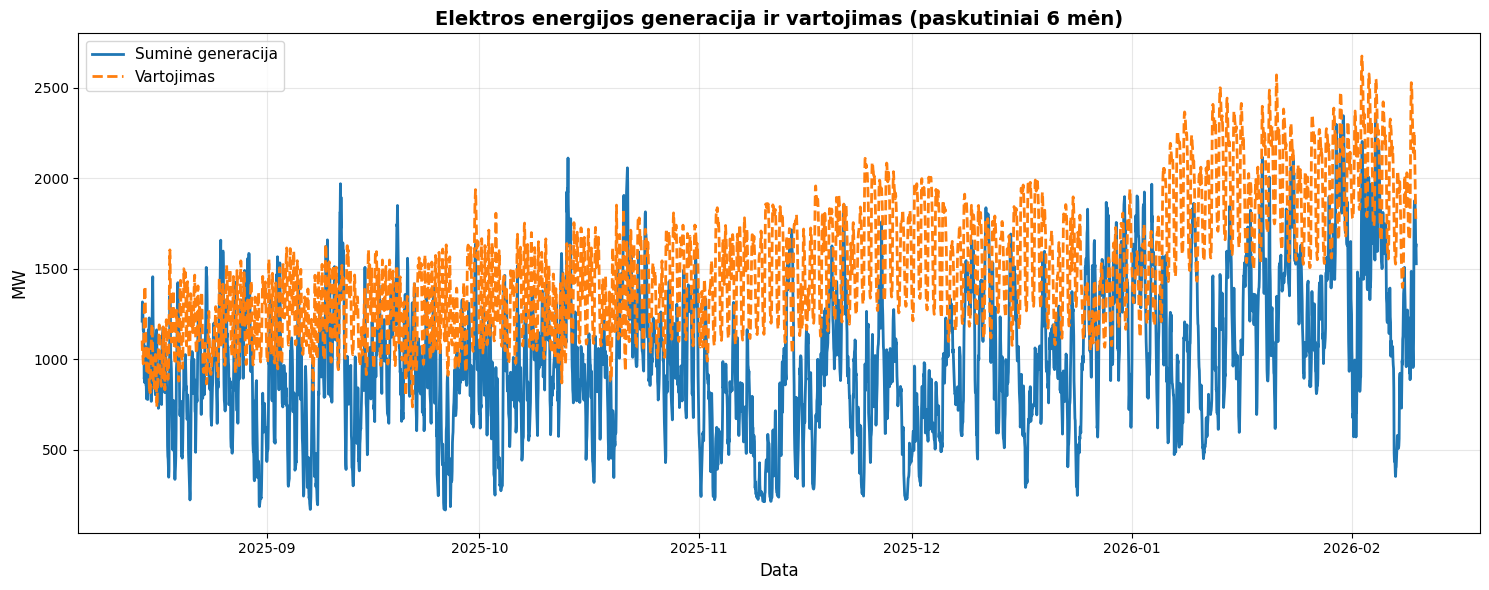

In [4]:
# Sąrašas gamybos stulpelių
generation_columns = [
    'Hidroelektrinių gamyba',
    'Kaupimo įrenginių gamyba',
    'Kitų energijos šaltinių gamyba',
    'Saulės elektrinių gamyba',
    'Vėjo elektrinių gamyba',
    'Šiluminių elektrinių gamyba'
]

# Suskaičiuoti suminę generaciją
df_final['Suminė generacija'] = df_final[generation_columns].sum(axis=1)

# Vizualizacija
plt.figure(figsize=(15, 6))
plt.plot(df_final['datetime'], df_final['Suminė generacija'], label='Suminė generacija', linewidth=2)
plt.plot(df_final['datetime'], df_final['Vartojimas'], label='Vartojimas', linewidth=2, linestyle='--')
plt.xlabel('Data', fontsize=12)
plt.ylabel('MW', fontsize=12)
plt.title('Elektros energijos generacija ir vartojimas (paskutiniai 6 mėn)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


5) Apskaičiuoti disbalansą tarp gamybos ir vartojimo, duomenis pateikti grafikem

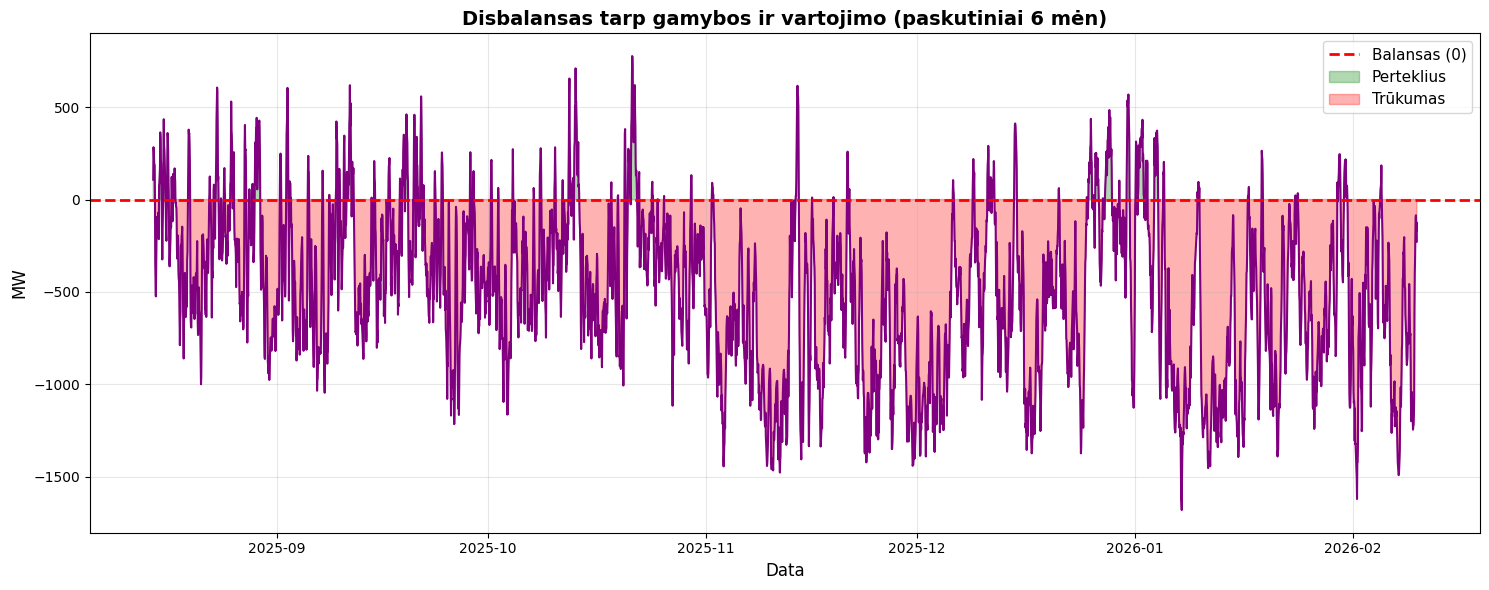

In [5]:
# Apskaičiuoti disbalansą (generacija - vartojimas)
df_final['Disbalansas'] = df_final['Suminė generacija'] - df_final['Vartojimas']

# Vizualizacija
plt.figure(figsize=(15, 6))
plt.plot(df_final['datetime'], df_final['Disbalansas'], linewidth=1.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Balansas (0)')
plt.fill_between(df_final['datetime'], df_final['Disbalansas'], 0, 
                 where=(df_final['Disbalansas'] >= 0), alpha=0.3, color='green', label='Perteklius')
plt.fill_between(df_final['datetime'], df_final['Disbalansas'], 0, 
                 where=(df_final['Disbalansas'] < 0), alpha=0.3, color='red', label='Trūkumas')
plt.xlabel('Data', fontsize=12)
plt.ylabel('MW', fontsize=12)
plt.title('Disbalansas tarp gamybos ir vartojimo (paskutiniai 6 mėn)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


6) Apskaičiuoti kiek procentiškai kiekvieną valandą generuoja kiekvienas šaltinis. Kiekvienam mėnesiui sugeneruoti apskritiminę diagramą.

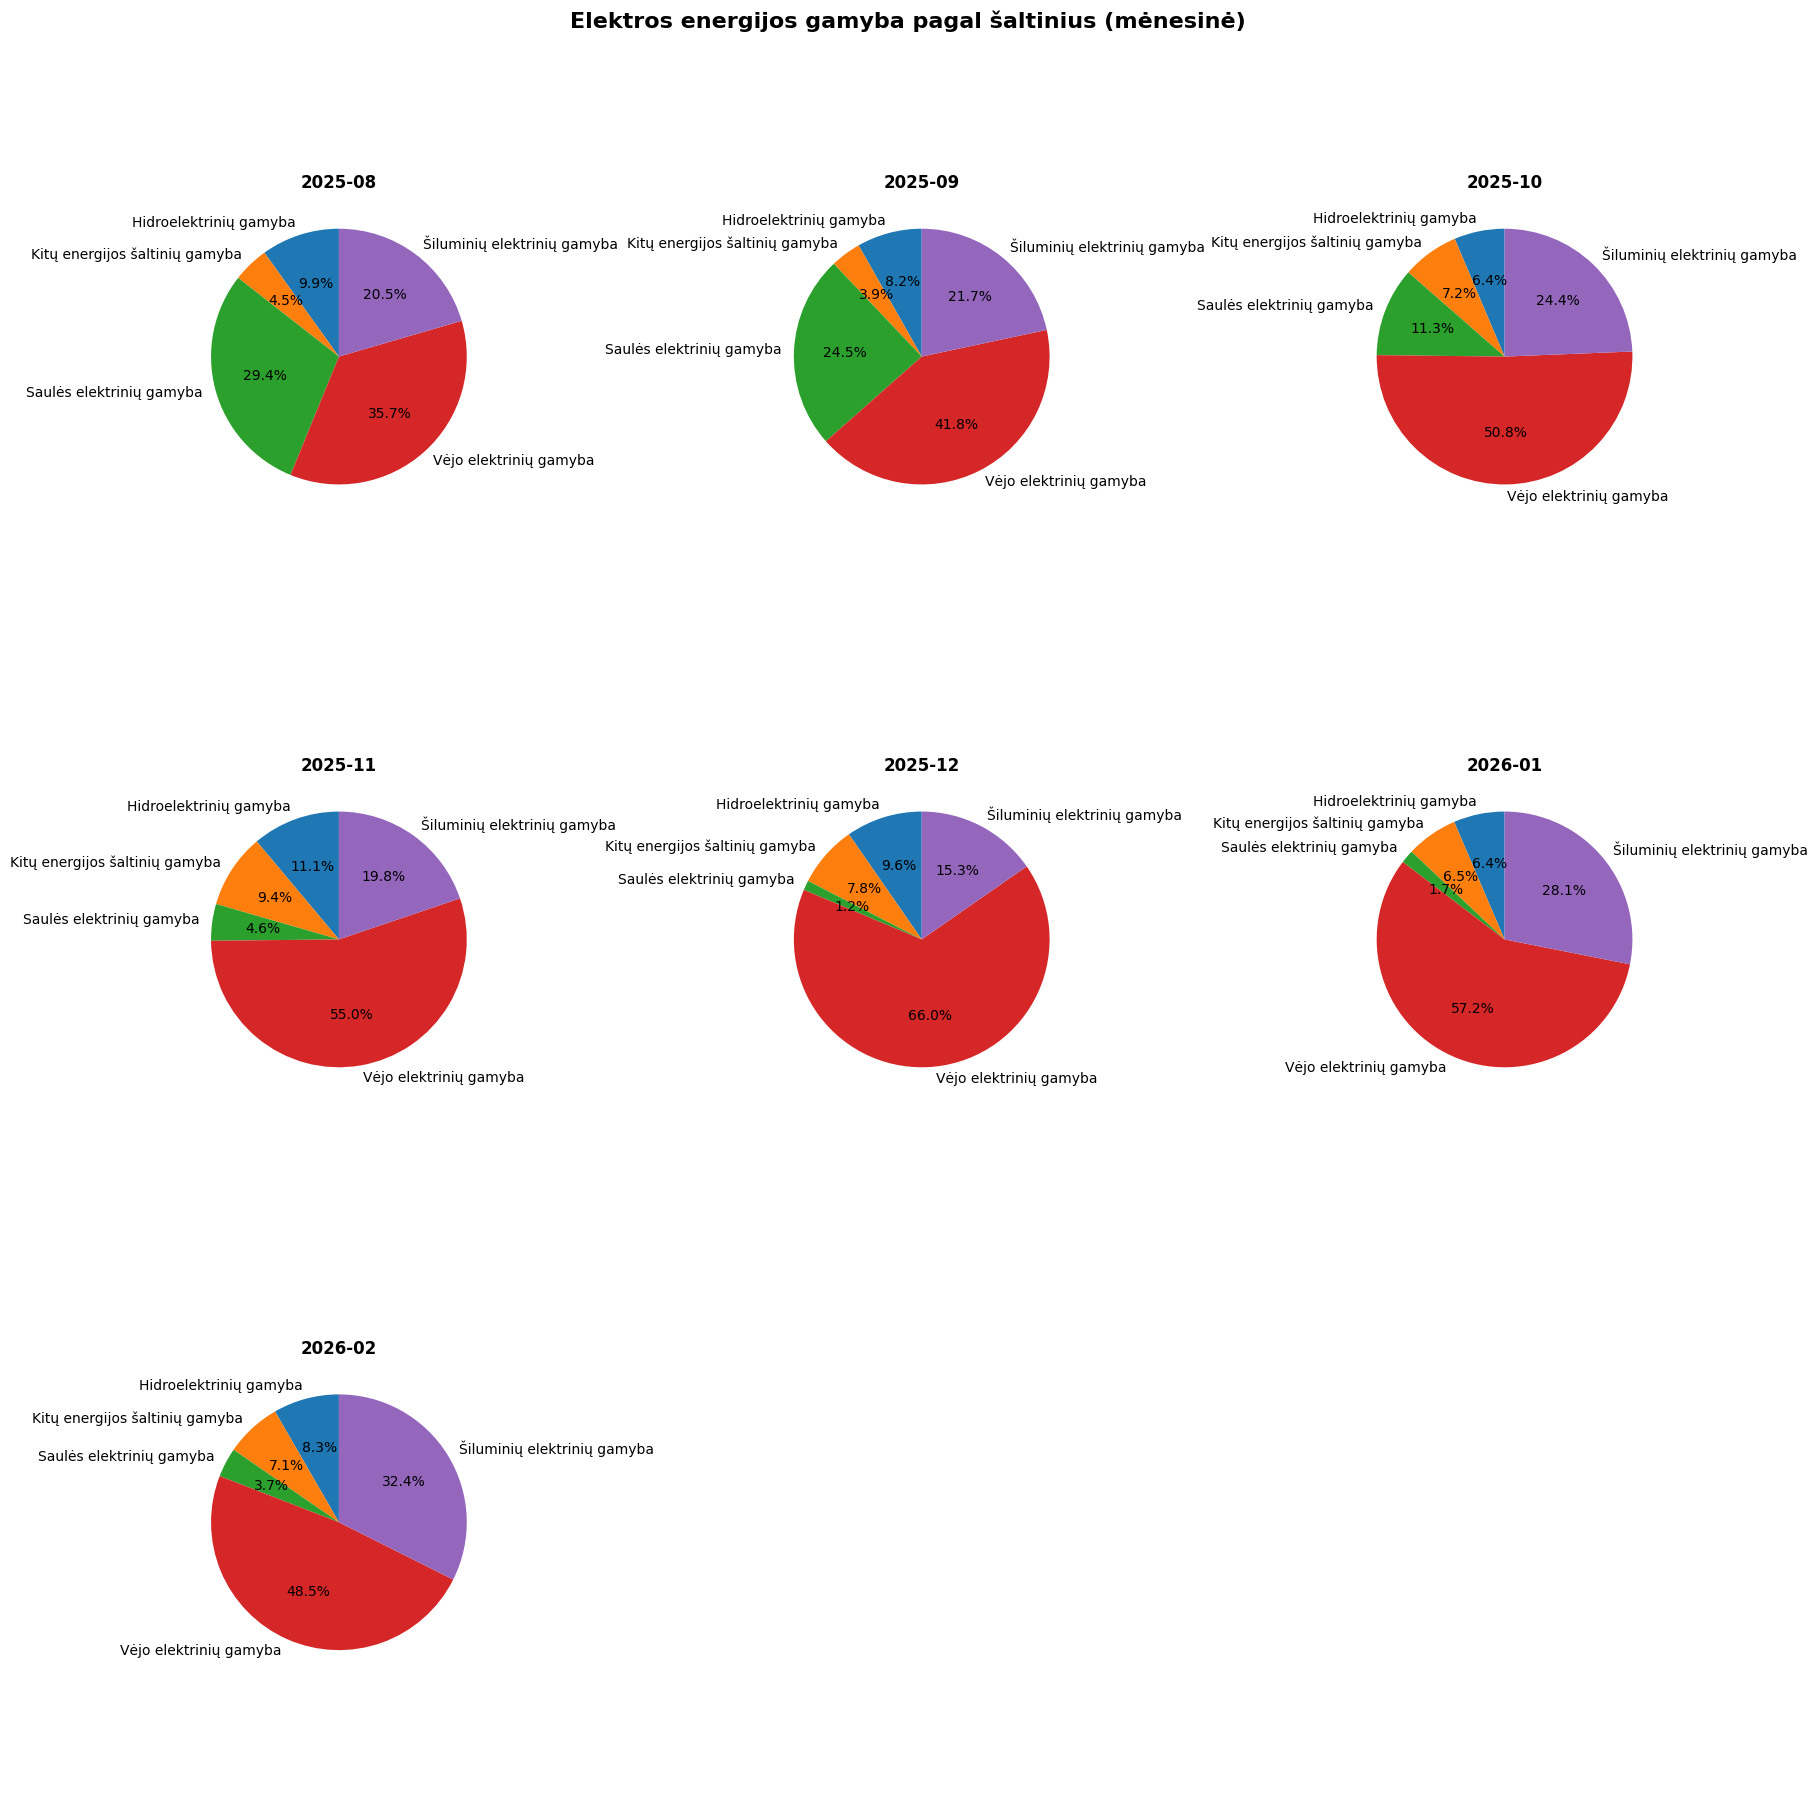

In [6]:
# Gamybos stulpeliai
generation_columns = [
    'Hidroelektrinių gamyba',
    'Kaupimo įrenginių gamyba',
    'Kitų energijos šaltinių gamyba',
    'Saulės elektrinių gamyba',
    'Vėjo elektrinių gamyba',
    'Šiluminių elektrinių gamyba'
]

# Apskaičiuoti procentinę generaciją kiekvieną valandą
for col in generation_columns:
    df_final[f'{col} %'] = (df_final[col] / df_final['Suminė generacija']) * 100

# Pridėti mėnesio stulpelį
df_final['Mėnuo'] = df_final['datetime'].dt.to_period('M')

# Apskaičiuoti vidutinius procentus kiekvienam mėnesiui
monthly_percentages = df_final.groupby('Mėnuo')[generation_columns].sum()

# Sukurti apskritimų diagramas kiekvienam mėnesiui
months = monthly_percentages.index
num_months = len(months)

# Apskaičiuoti subplot'ų išdėstymą
cols = 3
rows = (num_months + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
axes = axes.flatten() if num_months > 1 else [axes]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for idx, month in enumerate(months):
    ax = axes[idx]
    data = monthly_percentages.loc[month]
    
    # Filtruoti tik teigiamus
    positive_data = data[data > 0]
    
    ax.pie(positive_data, labels=positive_data.index, autopct='%1.1f%%', 
           colors=colors[:len(positive_data)], startangle=90)
    ax.set_title(f'{month}', fontsize=12, fontweight='bold')

# Paslėpti tuščius subplot'us
for idx in range(num_months, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Elektros energijos gamyba pagal šaltinius (mėnesinė)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()



Hidroelektrinių statistika:
  Paleidimų skaičius: 0
  Valandų veikė: 4313
  Bendras laikotarpis: 4313 valandų
  Veikimo laikas: 100.00%
  Vidutinė gamyba veikiant: 83.86 MW


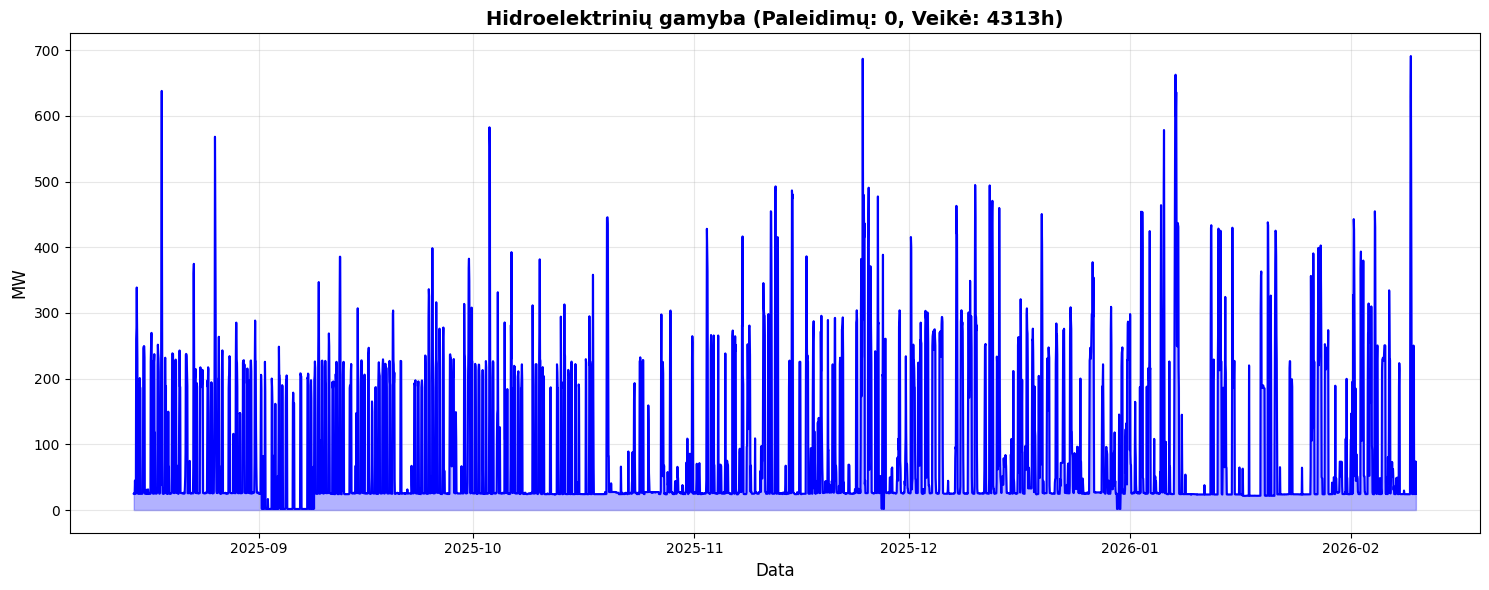

In [11]:
# Paimti hidroelektrinių duomenis
hydro = df_final[['datetime', 'Hidroelektrinių gamyba']].copy()

# Nustatyti, kada hidroelektrinės veikė (gamyba > 0)
hydro['Veikia'] = hydro['Hidroelektrinių gamyba'] > 0

# Rasti paleidimus (kai būsena pasikeičia iš False į True)
hydro['Paleidimas'] = (hydro['Veikia'] == True) & (hydro['Veikia'].shift(1) == False)

# Suskaičiuoti paleidimus
paleidimu_skaicius = hydro['Paleidimas'].sum()

# Suskaičiuoti kiek valandų veikė
valandu_veike = hydro['Veikia'].sum()

# Bendras laikotarpis
bendras_laikas = len(hydro)

print(f"\nHidroelektrinių statistika:")
print(f"  Paleidimų skaičius: {paleidimu_skaicius}")
print(f"  Valandų veikė: {valanду_veike}")
print(f"  Bendras laikotarpis: {bendras_laikas} valandų")
print(f"  Veikimo laikas: {(valanду_veike / bendras_laikas * 100):.2f}%")
print(f"  Vidutinė gamyba veikiant: {hydro[hydro['Veikia']]['Hidroelektrinių gamyba'].mean():.2f} MW")

# Vizualizacija
plt.figure(figsize=(15, 6))
plt.plot(hydro['datetime'], hydro['Hidroelektrinių gamyba'], linewidth=1.5, color='blue')
plt.fill_between(hydro['datetime'], hydro['Hidroelektrinių gamyba'], 0, 
                 where=(hydro['Hidroelektrinių gamyba'] > 0), alpha=0.3, color='blue')
plt.xlabel('Data', fontsize=12)
plt.ylabel('MW', fontsize=12)
plt.title(f'Hidroelektrinių gamyba (Paleidimų: {paleidimu_skaicius}, Veikė: {valanду_veike}h)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


8) Nustatyti kurią savaitės dieną būna didžiausias elektros vartojimas


✓ DIDŽIAUSIAS VIDUTINIS VARTOJIMAS: Pirmadienis (1575.23 MW)


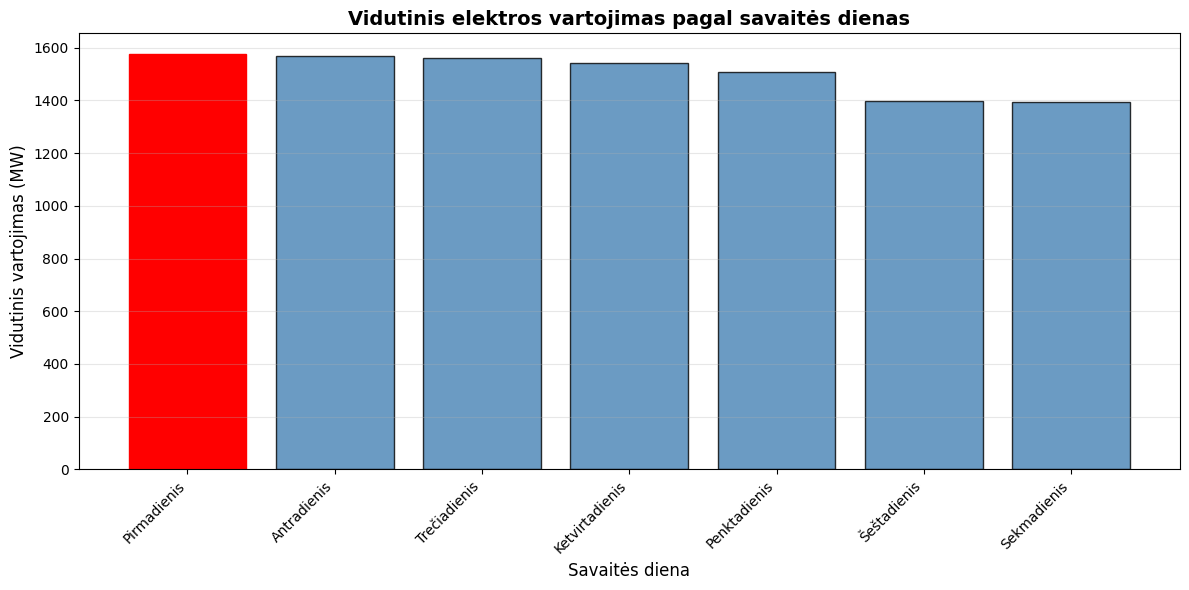

In [8]:
# Pridėti savaitės dienos stulpelį
df_final['Savaitės diena'] = df_final['datetime'].dt.day_name()
df_final['Savaitės dienos Nr'] = df_final['datetime'].dt.dayofweek

# Apskaičiuoti vidutinį vartojimą kiekvienai savaitės dienai
vartojimas_pagal_diena = df_final.groupby('Savaitės diena')['Vartojimas'].agg(['mean', 'max', 'min']).round(2)

# Surūšiuoti pagal savaitės dienų tvarką (pirmadienis-sekmadienis)
dienu_tvarka = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vartojimas_pagal_diena = vartojimas_pagal_diena.reindex(dienu_tvarka)

# Lietuviški pavadinimai
lietuviski_pavadinimai = {
    'Monday': 'Pirmadienis',
    'Tuesday': 'Antradienis',
    'Wednesday': 'Trečiadienis',
    'Thursday': 'Ketvirtadienis',
    'Friday': 'Penktadienis',
    'Saturday': 'Šeštadienis',
    'Sunday': 'Sekmadienis'
}

vartojimas_pagal_diena.index = vartojimas_pagal_diena.index.map(lietuviski_pavadinimai)

# Rasti dieną su didžiausiu vidutiniu vartojimu
didziausias_vartojimas = vartojimas_pagal_diena['mean'].idxmax()
didziausias_vartojimas_value = vartojimas_pagal_diena['mean'].max()

print(f"\n✓ DIDŽIAUSIAS VIDUTINIS VARTOJIMAS: {didziausias_vartojimas} ({didziausias_vartojimas_value:.2f} MW)")

# Vizualizacija
plt.figure(figsize=(12, 6))
bars = plt.bar(vartojimas_pagal_diena.index, vartojimas_pagal_diena['mean'], 
               color='steelblue', alpha=0.8, edgecolor='black')

# Pažymėti didžiausią
max_idx = vartojimas_pagal_diena['mean'].argmax()
bars[max_idx].set_color('red')
bars[max_idx].set_alpha(1.0)

plt.xlabel('Savaitės diena', fontsize=12)
plt.ylabel('Vidutinis vartojimas (MW)', fontsize=12)
plt.title('Vidutinis elektros vartojimas pagal savaitės dienas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


9) Apskaičiuoti "vidutinę" elektros vartojimo savaitę, t.y. savaitę sudalinus valandomis paskaičiuoti kiekvienai valandai vidutinę reikšmę iš turimo duomenų periodo ir atvaizduoti grafiškai.


Vidutinės savaitės duomenys (168 valandos):
  Minimalus vartojimas: 1151.03 MW
  Maksimalus vartojimas: 1859.36 MW
  Vidutinis vartojimas: 1505.86 MW

Pirmosios 24 valandos (Pirmadienis):
Savaitės valanda
0     1227.998000
1     1189.860500
2     1172.309231
3     1168.597962
4     1186.757423
5     1270.008192
6     1503.173192
7     1699.324577
8     1834.201308
9     1859.356731
10    1822.250115
11    1788.172269
12    1752.402846
13    1742.266077
14    1705.375615
15    1698.204615
16    1705.801885
17    1739.726038
18    1765.264269
19    1764.998423
20    1726.411038
21    1631.708615
22    1489.836269
23    1361.499269
Name: Vartojimas, dtype: float64


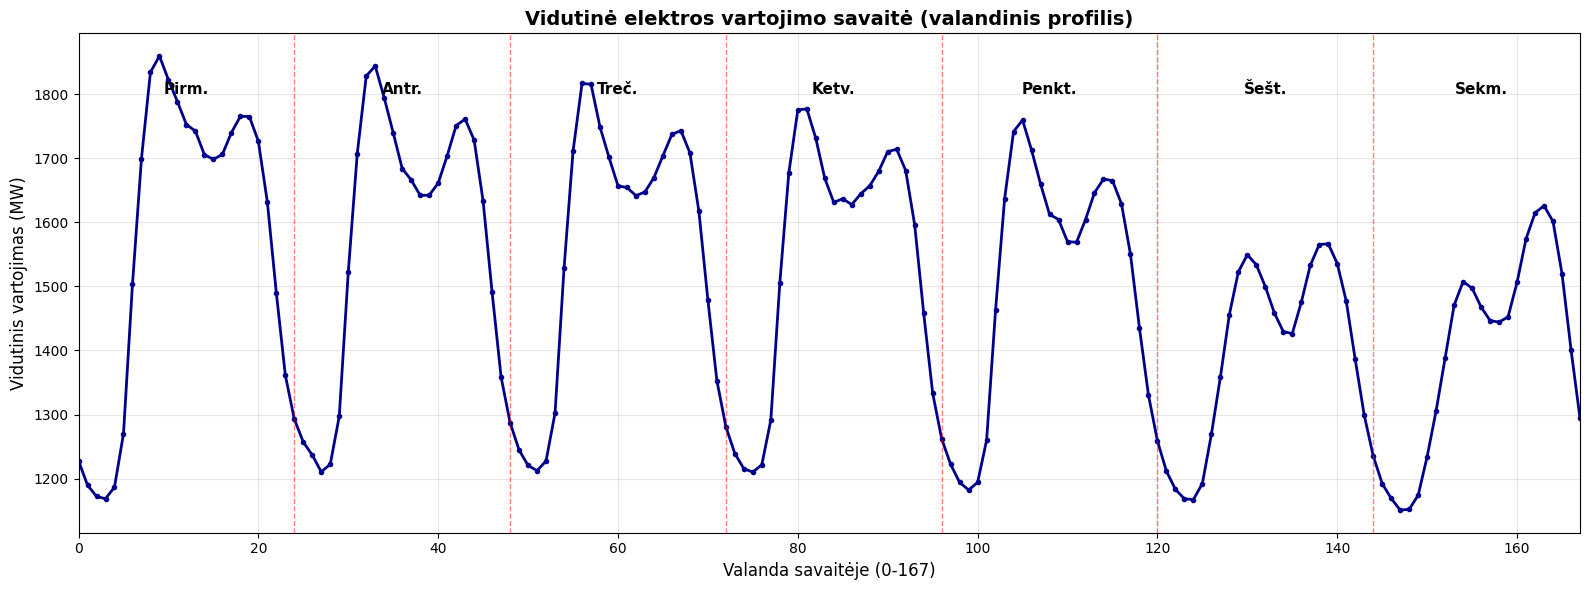

In [9]:
# Pridėti savaitės dienos numerį (0=Pirmadienis, 6=Sekmadienis) ir valandą
df_final['Savaitės dienos Nr'] = df_final['datetime'].dt.dayofweek
df_final['Valanda'] = df_final['datetime'].dt.hour

# Sukurti unikalų savaitės valandos indeksą (0-167: 7 dienos × 24 valandos)
df_final['Savaitės valanda'] = df_final['Savaitės dienos Nr'] * 24 + df_final['Valanda']

# Apskaičiuoti vidutinį vartojimą kiekvienai savaitės valandai
vidutine_savaite = df_final.groupby('Savaitės valanda')['Vartojimas'].mean()

print("\nVidutinės savaitės duomenys (168 valandos):")
print(f"  Minimalus vartojimas: {vidutine_savaite.min():.2f} MW")
print(f"  Maksimalus vartojimas: {vidutine_savaite.max():.2f} MW")
print(f"  Vidutinis vartojimas: {vidutine_savaite.mean():.2f} MW")

print("\nPirmosios 24 valandos (Pirmadienis):")
print(vidutine_savaite.head(24))

# Vizualizacija
plt.figure(figsize=(16, 6))
plt.plot(vidutine_savaite.index, vidutine_savaite.values, linewidth=2, color='darkblue', marker='o', markersize=3)

# Pridėti vertikalias linijas tarp dienų
for day in range(1, 7):
    plt.axvline(x=day*24, color='red', linestyle='--', alpha=0.5, linewidth=1)

# Pridėti dienų pavadinimus
dienu_pavadinimai = ['Pirm.', 'Antr.', 'Treč.', 'Ketv.', 'Penkt.', 'Šešt.', 'Sekm.']
for i, diena in enumerate(dienu_pavadinimai):
    plt.text(i*24 + 12, plt.ylim()[1]*0.95, diena, ha='center', fontsize=11, fontweight='bold')

plt.xlabel('Valanda savaitėje (0-167)', fontsize=12)
plt.ylabel('Vidutinis vartojimas (MW)', fontsize=12)
plt.title('Vidutinė elektros vartojimo savaitė (valandinis profilis)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xlim(0, 167)
plt.tight_layout()
plt.show()


10) Užfittinti polinomą kuris geriausiai reprezentuotų elektros vartojimą "vidutinės" savaitės bėgyje (naudoti (9) punkto rezultatą).


Polinomo laipsnio paieška:
  Laipsnis 3: klaida = 38132.18
  Laipsnis 5: klaida = 36131.18
  Laipsnis 7: klaida = 34682.75
  Laipsnis 9: klaida = 33016.87

✓ GERIAUSIAS POLINOMAS: laipsnis 9 (mažiausia klaida: 33016.87)


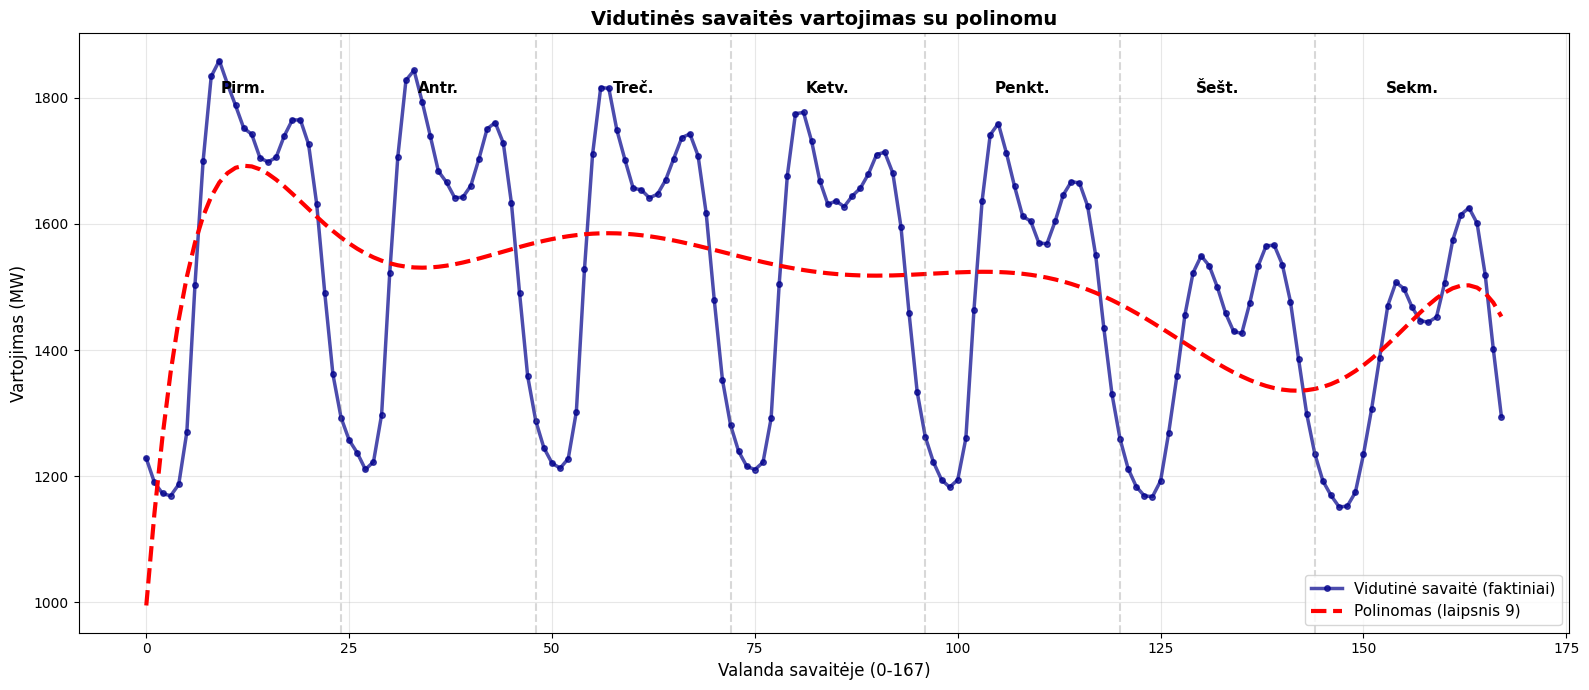

In [10]:
import numpy as np

# X ir Y duomenys
x = vidutine_savaite.index.values
y = vidutine_savaite.values

# Išbandyti skirtingus polinomo laipsnius
degrees = [3, 5, 7, 9]
best_degree = None
best_error = np.inf

print("\nPolinomo laipsnio paieška:")
for degree in degrees:
    # Pritaikyti polinomą (numpy daro viską automatiškai)
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)
    y_pred = poly(x)
    
    # Apskaičiuoti klaidą (kuo mažesnė, tuo geriau)
    error = np.mean((y - y_pred)**2)
    
    print(f"  Laipsnis {degree}: klaida = {error:.2f}")
    
    if error < best_error:
        best_error = error
        best_degree = degree

print(f"\n✓ GERIAUSIAS POLINOMAS: laipsnis {best_degree} (mažiausia klaida: {best_error:.2f})")

# Gauti geriausio polinomo predikcijas
best_coeffs = np.polyfit(x, y, best_degree)
best_poly = np.poly1d(best_coeffs)
y_fitted = best_poly(x)

# Vizualizacija
plt.figure(figsize=(16, 7))

# Tikri duomenys
plt.plot(x, y, linewidth=2.5, color='darkblue', marker='o', markersize=4, 
         label='Vidutinė savaitė (faktiniai)', alpha=0.7)

# Pritaikytas polinomas
plt.plot(x, y_fitted, linewidth=3, color='red', 
         label=f'Polinomas (laipsnis {best_degree})', linestyle='--')

# Dienų linijos
for day in range(1, 7):
    plt.axvline(x=day*24, color='gray', linestyle='--', alpha=0.3)

# Dienų pavadinimai
dienu_pavadinimai = ['Pirm.', 'Antr.', 'Treč.', 'Ketv.', 'Penkt.', 'Šešt.', 'Sekm.']
for i, diena in enumerate(dienu_pavadinimai):
    plt.text(i*24 + 12, plt.ylim()[1]*0.95, diena, ha='center', fontsize=11, fontweight='bold')

plt.xlabel('Valanda savaitėje (0-167)', fontsize=12)
plt.ylabel('Vartojimas (MW)', fontsize=12)
plt.title('Vidutinės savaitės vartojimas su polinomu', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
